# Economic Data Analysis | Day 1 Demo

Let's get to know the class!

In [3]:
# Imports
import pandas as pd
import seaborn as sns

# Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load The Data

In [2]:
data = pd.read_csv(file_path + 'Part_0_Survey.csv')
data.head()

,Unnamed: 0,Timestamp,First and Last Initials (eg. Taylor Weidman -> TW),What is your favorite color?,What is your age?,How many siblings to you have?,Approximately how many miles away from Pittsburgh is your hometown?,What is/are your major(s)?,What time did you wake up this morning?,Did you like your statistics class?,How excited are you for this class?
0,0,2025/01/08 3:44:16 PM EST,KL,Red,20,2,0,Psychology,8:00,10,6
1,1,2025/01/08 3:57:15 PM EST,MD,Blue,20,3,250,Finance,11:00,5,7
2,2,2025/01/08 3:57:15 PM EST,PO,Blue,20,1,15,Economics and Japanese,7:30,7,8
3,3,2025/01/08 3:57:17 PM EST,BP,Red,19,3,360,Biology,8:50,10,10
4,4,2025/01/08 3:57:18 PM EST,JM,Blue,21,1,200,Marketing,9:00,7,9


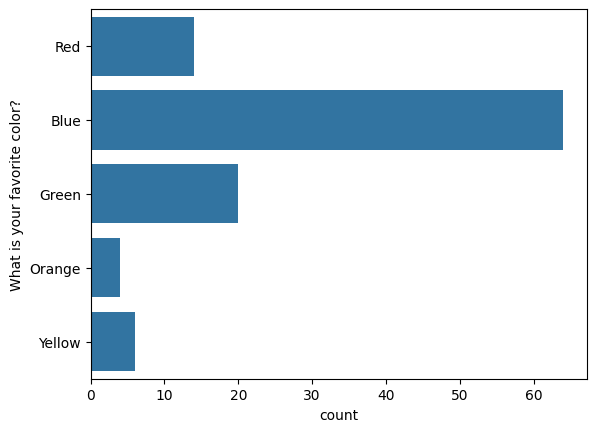

In [4]:
sns.countplot(y='What is your favorite color?', data=data);

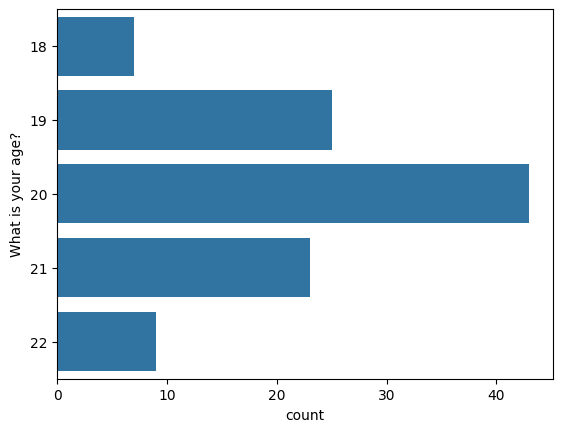

In [6]:
sns.countplot(y='What is your age?', data=data, order=[18, 19, 20, 21, 22]);

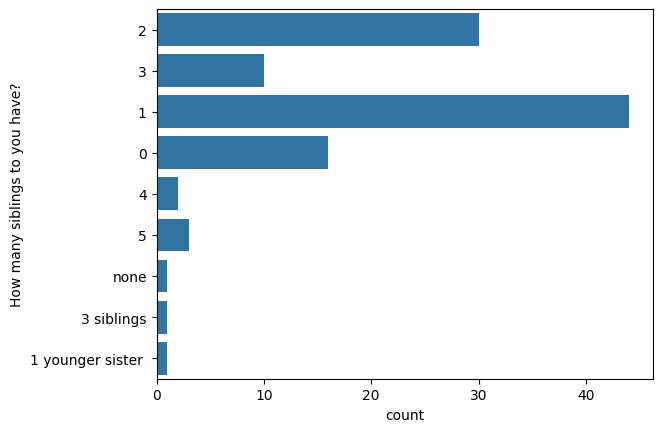

In [ ]:
sns.countplot(y='How many siblings to you have?', data=data);

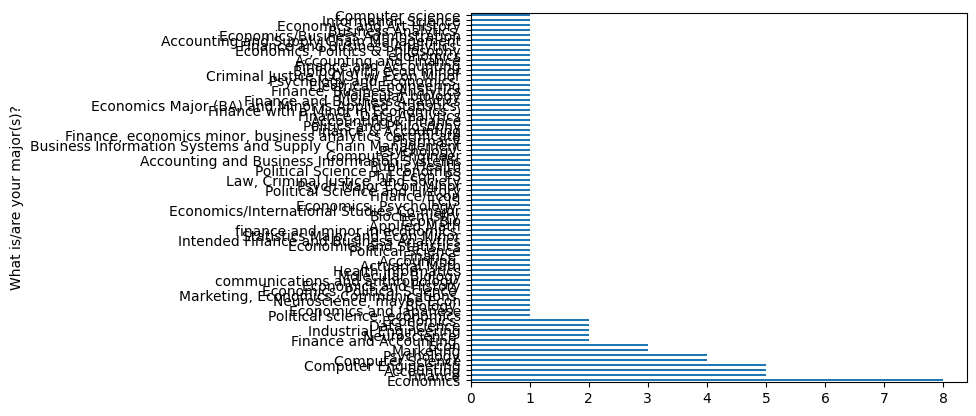

In [ ]:
data['What is/are your major(s)?'].value_counts().plot(kind='barh');

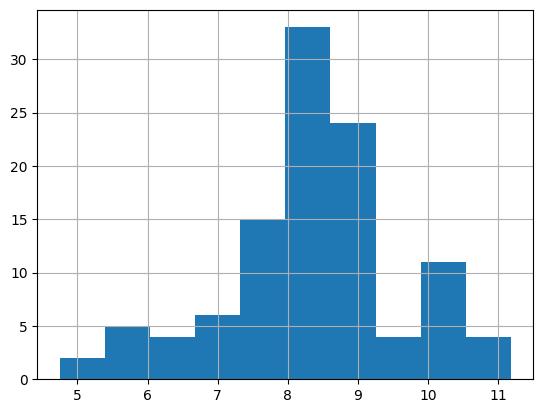

In [ ]:
data['What time did you wake up this morning?'] = pd.to_datetime(data['What time did you wake up this morning?'], errors='coerce')
data['What time did you wake up this morning?'].apply(lambda x: x.hour + x.minute / 60.0 if pd.notnull(x) else None).hist();

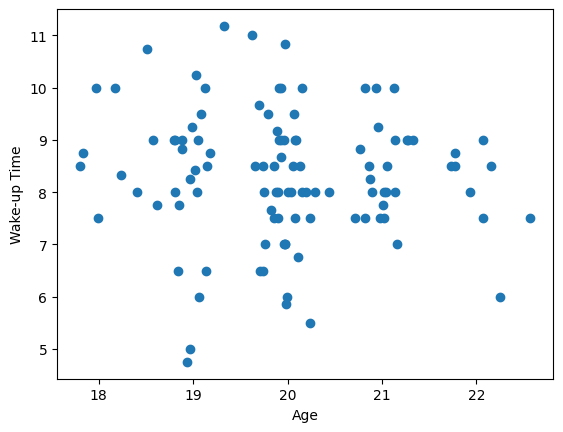

In [ ]:
x = pd.to_numeric(data['What is your age?'], errors='coerce')
x = x.dropna()
# jitter x
x = x + np.random.normal(0, 0.2, len(x))

y = data.loc[x.index, 'What time did you wake up this morning?'].apply(lambda x: x.hour + x.minute/60.0)

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Wake-up Time');

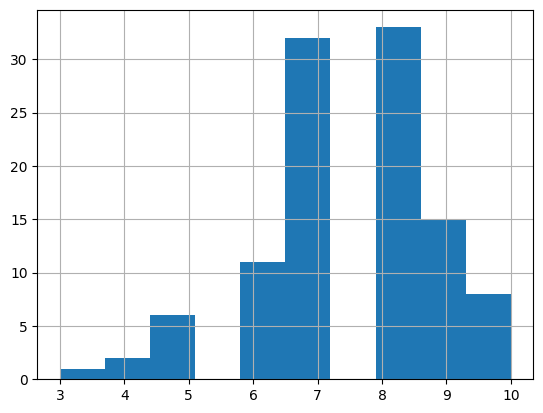

In [ ]:
data['How excited are you for this class?'].astype(float).sort_values().hist();


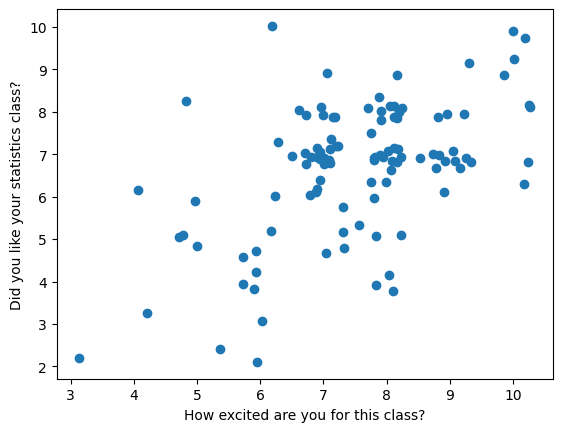

In [ ]:
x = data['How excited are you for this class?'].astype(float)
# jitter x
x = x + np.random.normal(0, 0.2, len(x))
y = data['Did you like your statistics class?'].astype(float)
# jitter y
y = y + np.random.normal(0, 0.2, len(y))
plt.scatter(x, y)
plt.xlabel('How excited are you for this class?')
plt.ylabel('Did you like your statistics class?');
